In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
data

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


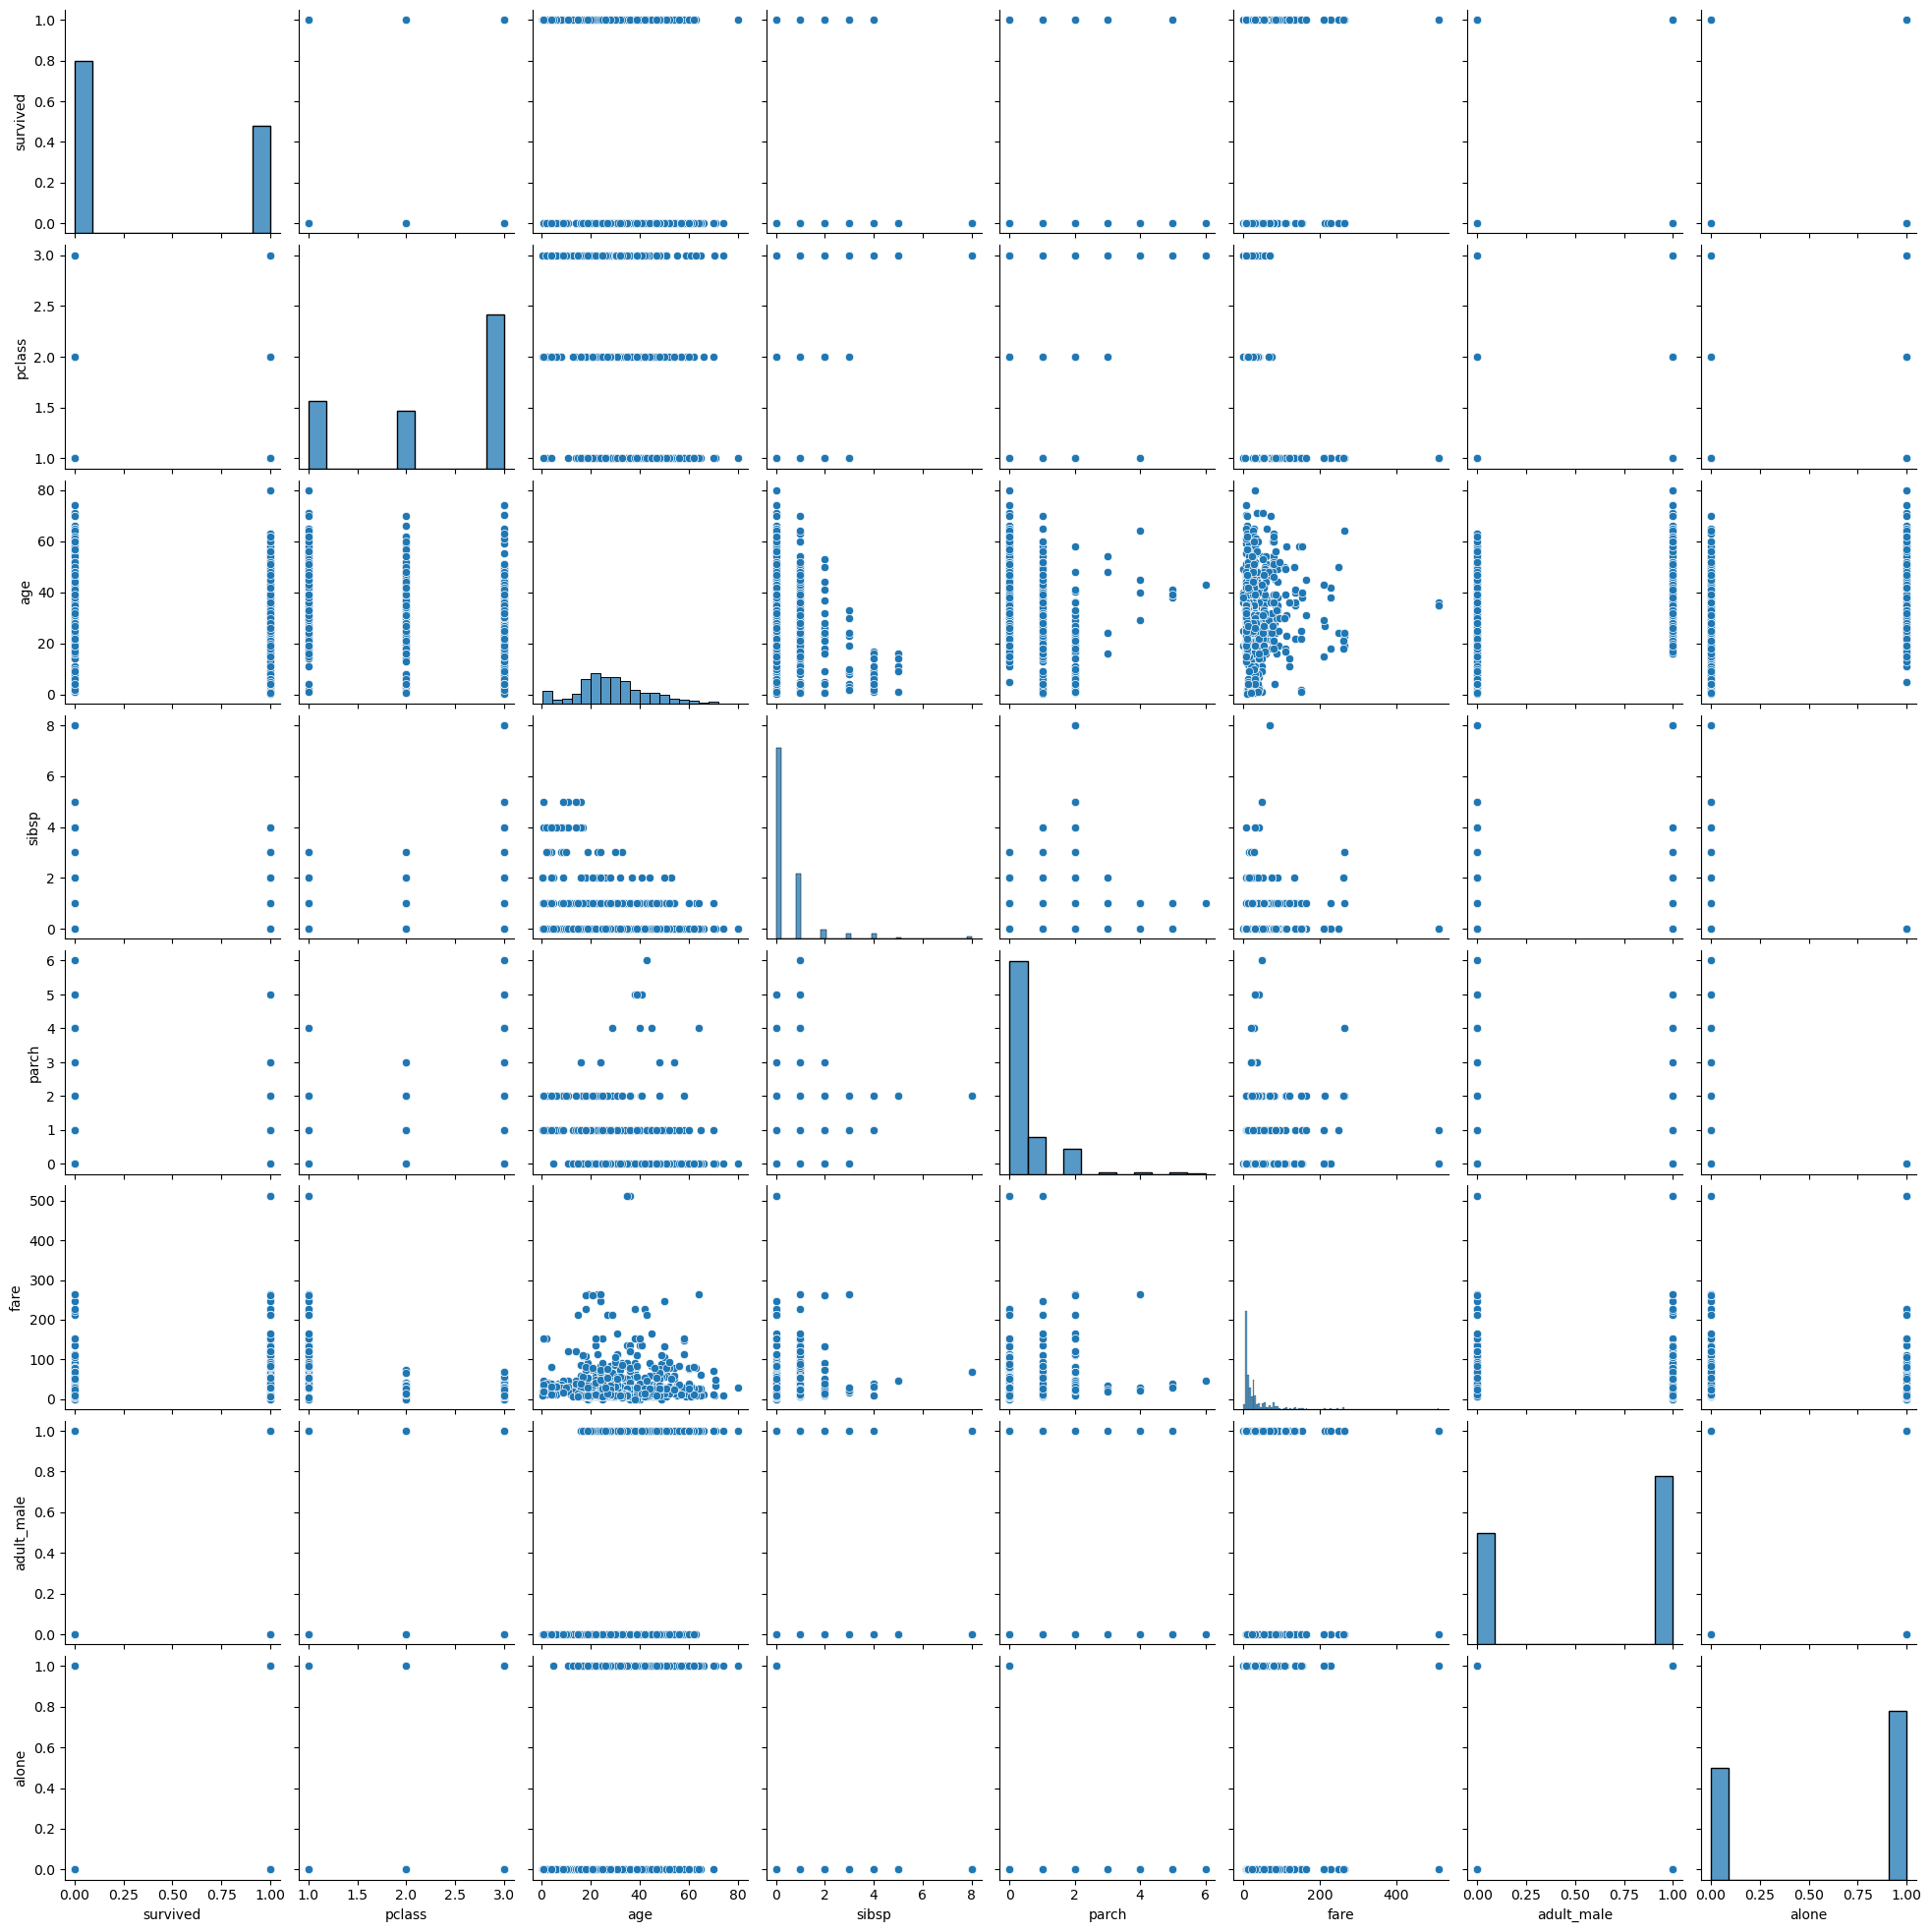

In [6]:
sns.pairplot(data)

In [7]:
data.drop(['deck'], axis=1, inplace=True)
data.drop(['class'], axis=1, inplace=True)
data.drop(['adult_male'], axis=1, inplace=True)

In [8]:
data['age'].fillna(data['age'].mean(), 
                   inplace=True)
data['embarked'].fillna(method='ffill', 
                           inplace=True)
data['embark_town'].fillna(method='ffill', 
                           inplace=True)

/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/2825852783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(),
/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/2825852783.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   who          891 non-null    object 
 9   embark_town  891 non-null    object 
 10  alive        891 non-null    object 
 11  alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


In [10]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
data.alive.unique()

array(['no', 'yes'], dtype=object)

In [12]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [13]:
data.alive.unique()

array(['no', 'yes'], dtype=object)

In [14]:
data = data.replace({'yes':1, 'no':0})
data = data.replace({'female':1, 'male':0})
data = data.replace({'man':1, 'woman':1, 'child':0})
data = data.replace({True:1, False:0})


/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/199512152.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'yes':1, 'no':0})
/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/199512152.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'female':1, 'male':0})
/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/199512152.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

In [16]:
data = data.drop(['embark_town'], axis=1)

In [17]:
data

survived  pclass  sex        age  sibsp  parch     fare embarked  who  \
0           0       3    0  22.000000      1      0   7.2500        S    1   
1           1       1    1  38.000000      1      0  71.2833        C    1   
2           1       3    1  26.000000      0      0   7.9250        S    1   
3           1       1    1  35.000000      1      0  53.1000        S    1   
4           0       3    0  35.000000      0      0   8.0500        S    1   
..        ...     ...  ...        ...    ...    ...      ...      ...  ...   
886         0       2    0  27.000000      0      0  13.0000        S    1   
887         1       1    1  19.000000      0      0  30.0000        S    1   
888         0       3    1  29.699118      1      2  23.4500        S    1   
889         1       1    0  26.000000      0      0  30.0000        C    1   
890         0       3    0  32.000000      0      0   7.7500        Q    1   

     alive  alone  
0        0      0  
1        1      0  
2        1      1  
3        1      0  
4        0      1  
..     ...    ...  
886      0      1  
887      1      1  
888      0      0  
889      1      1  
890      0      1  

[891 rows x 11 columns]

In [18]:
data = pd.get_dummies(data)

In [19]:
data

survived  pclass  sex        age  sibsp  parch     fare  who  alive  \
0           0       3    0  22.000000      1      0   7.2500    1      0   
1           1       1    1  38.000000      1      0  71.2833    1      1   
2           1       3    1  26.000000      0      0   7.9250    1      1   
3           1       1    1  35.000000      1      0  53.1000    1      1   
4           0       3    0  35.000000      0      0   8.0500    1      0   
..        ...     ...  ...        ...    ...    ...      ...  ...    ...   
886         0       2    0  27.000000      0      0  13.0000    1      0   
887         1       1    1  19.000000      0      0  30.0000    1      1   
888         0       3    1  29.699118      1      2  23.4500    1      0   
889         1       1    0  26.000000      0      0  30.0000    1      1   
890         0       3    0  32.000000      0      0   7.7500    1      0   

     alone  embarked_C  embarked_Q  embarked_S  
0        0       False       False        True  
1        0        True       False       False  
2        1       False       False        True  
3        0       False       False        True  
4        1       False       False        True  
..     ...         ...         ...         ...  
886      1       False       False        True  
887      1       False       False        True  
888      0       False       False        True  
889      1        True       False       False  
890      1       False        True       False  

[891 rows x 13 columns]

In [20]:
data.replace({False:0, True:1}, inplace=True)
data.drop(['embarked_S'], axis=1, inplace=True)
data

/var/folders/wd/8t2cjvkx45qdh6rl82cn9h040000gn/T/ipykernel_2992/1433177774.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False:0, True:1}, inplace=True)


survived  pclass  sex        age  sibsp  parch     fare  who  alive  \
0           0       3    0  22.000000      1      0   7.2500    1      0   
1           1       1    1  38.000000      1      0  71.2833    1      1   
2           1       3    1  26.000000      0      0   7.9250    1      1   
3           1       1    1  35.000000      1      0  53.1000    1      1   
4           0       3    0  35.000000      0      0   8.0500    1      0   
..        ...     ...  ...        ...    ...    ...      ...  ...    ...   
886         0       2    0  27.000000      0      0  13.0000    1      0   
887         1       1    1  19.000000      0      0  30.0000    1      1   
888         0       3    1  29.699118      1      2  23.4500    1      0   
889         1       1    0  26.000000      0      0  30.0000    1      1   
890         0       3    0  32.000000      0      0   7.7500    1      0   

     alone  embarked_C  embarked_Q  
0        0           0           0  
1        0           1           0  
2        1           0           0  
3        0           0           0  
4        1           0           0  
..     ...         ...         ...  
886      1           0           0  
887      1           0           0  
888      0           0           0  
889      1           1           0  
890      1           0           1  

[891 rows x 12 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   who         891 non-null    int64  
 8   alive       891 non-null    int64  
 9   alone       891 non-null    int64  
 10  embarked_C  891 non-null    int64  
 11  embarked_Q  891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


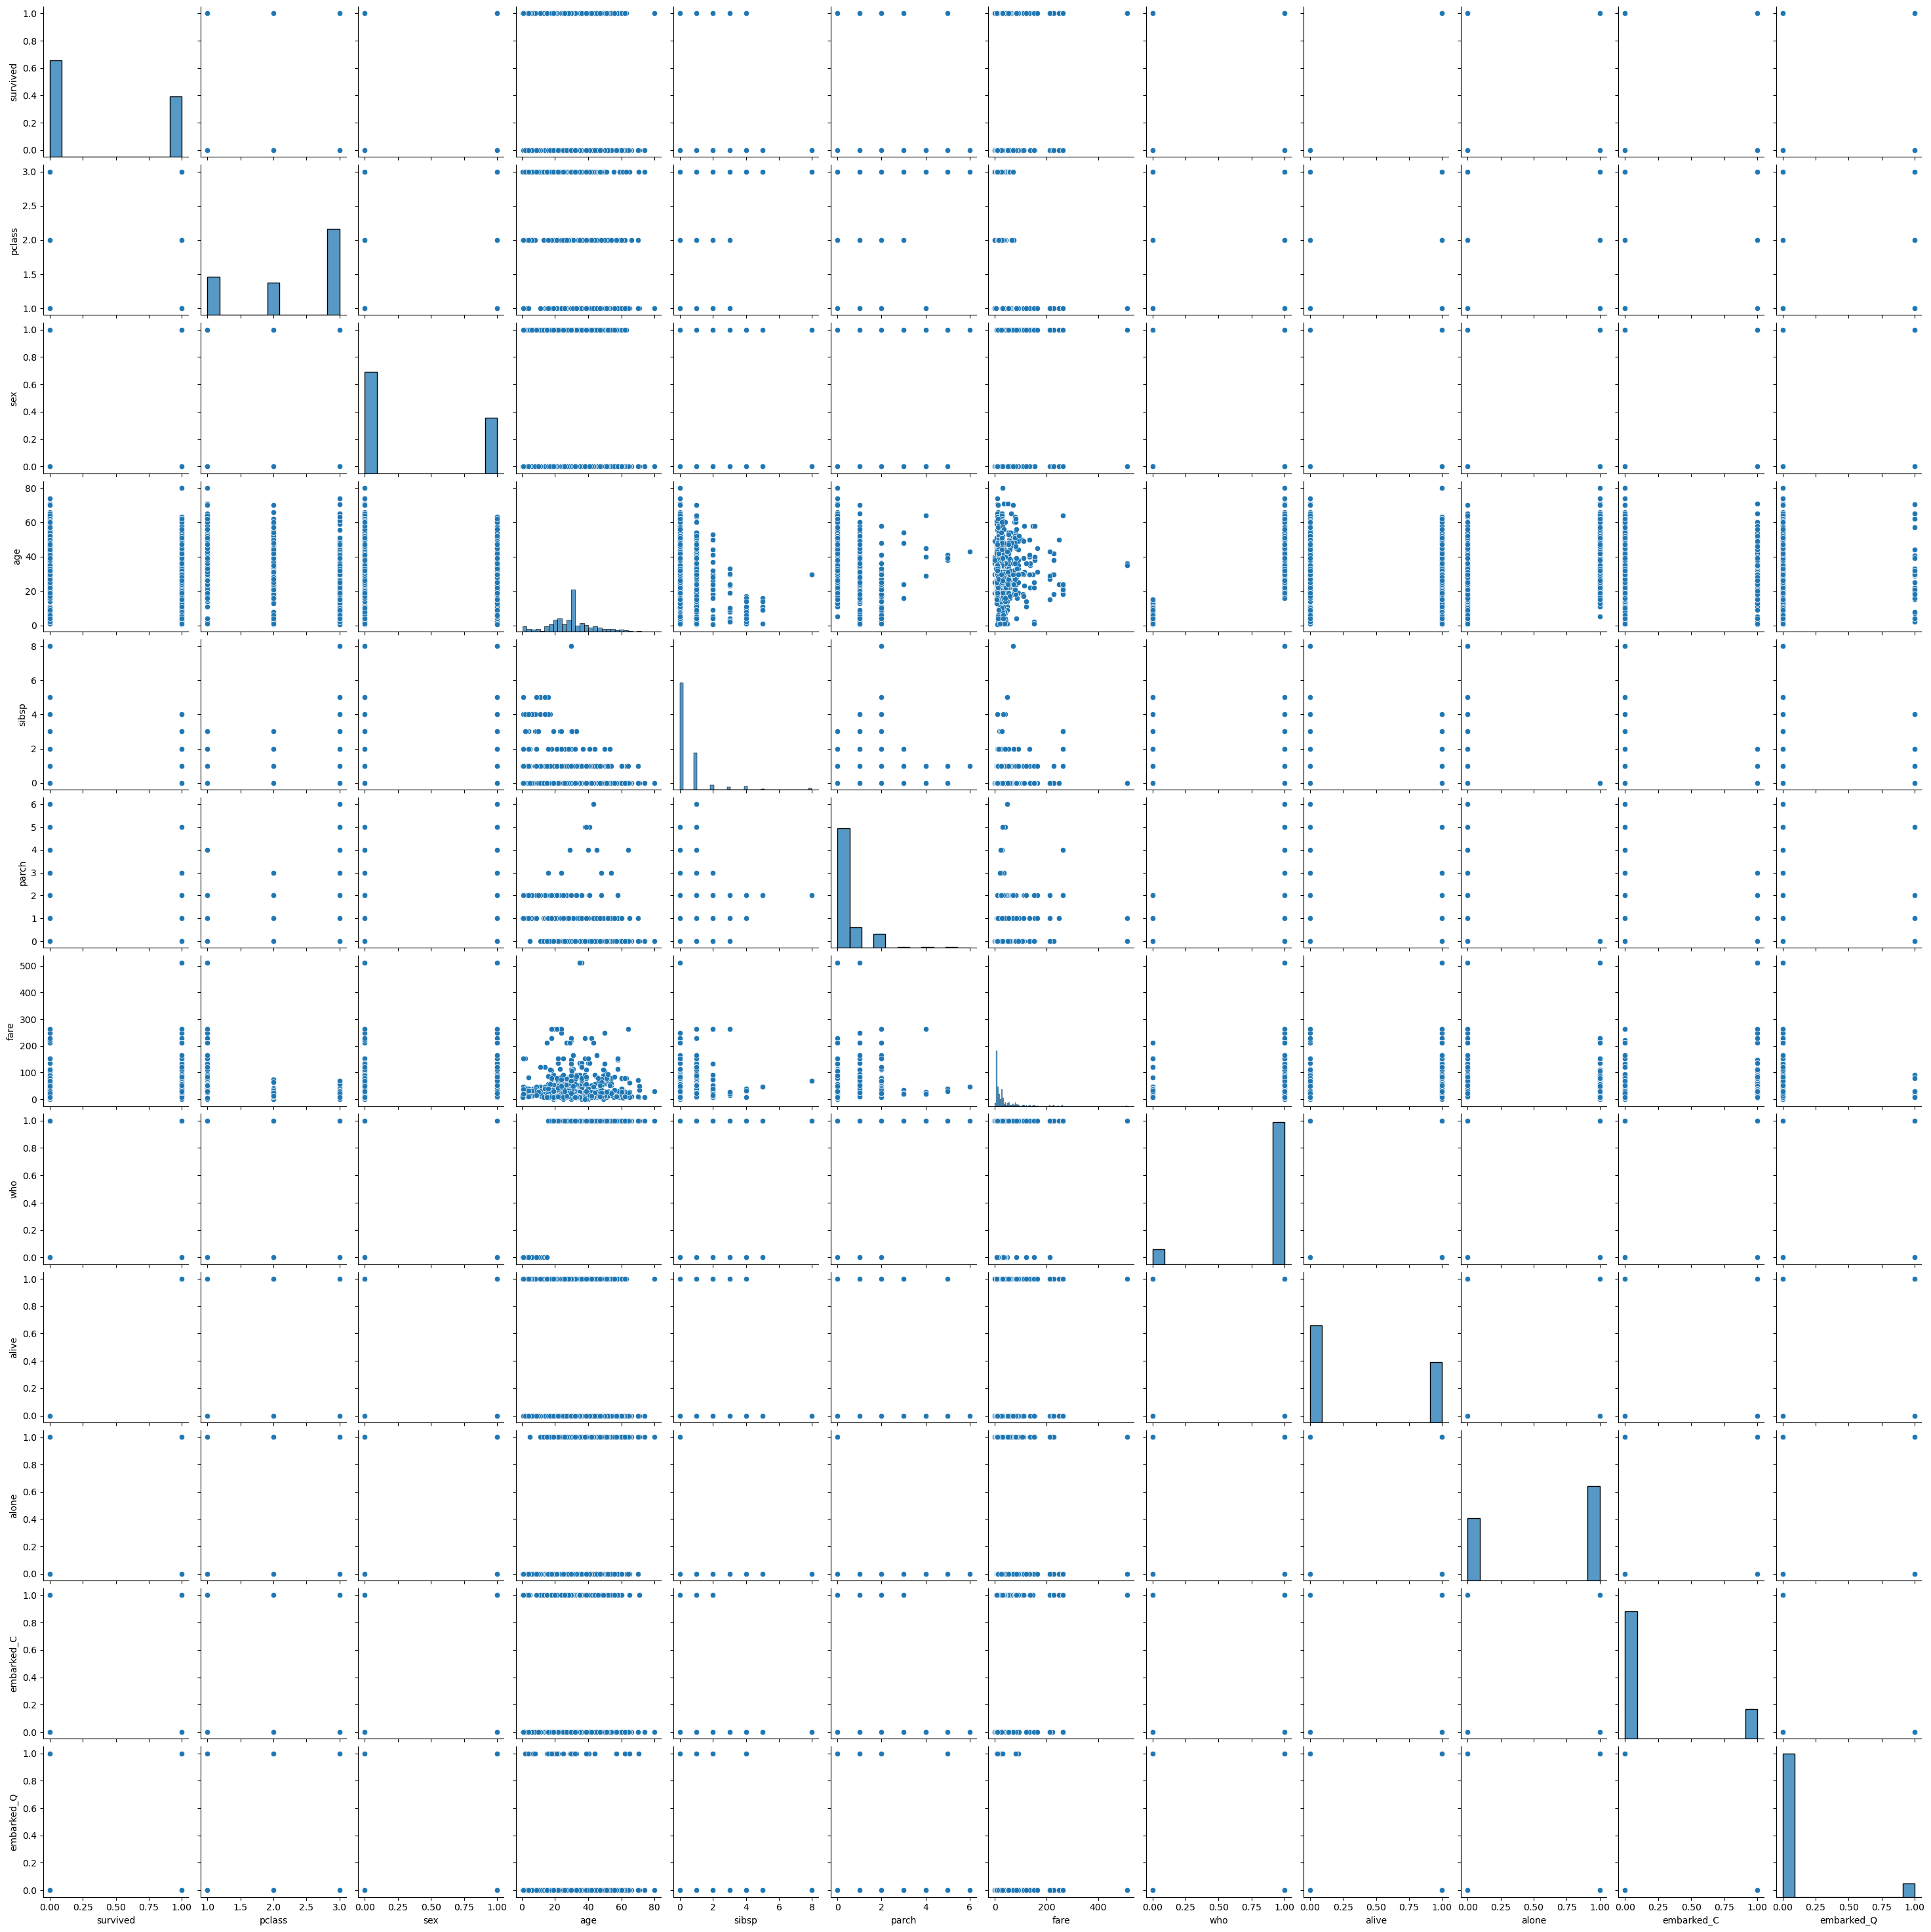

In [22]:
sns.pairplot(data)

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

/Users/lucia/opt/anaconda3/envs/samsung/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [24]:
cluster_labels = kmeans.labels_

In [25]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [27]:
data['cluster'] = cluster_labels

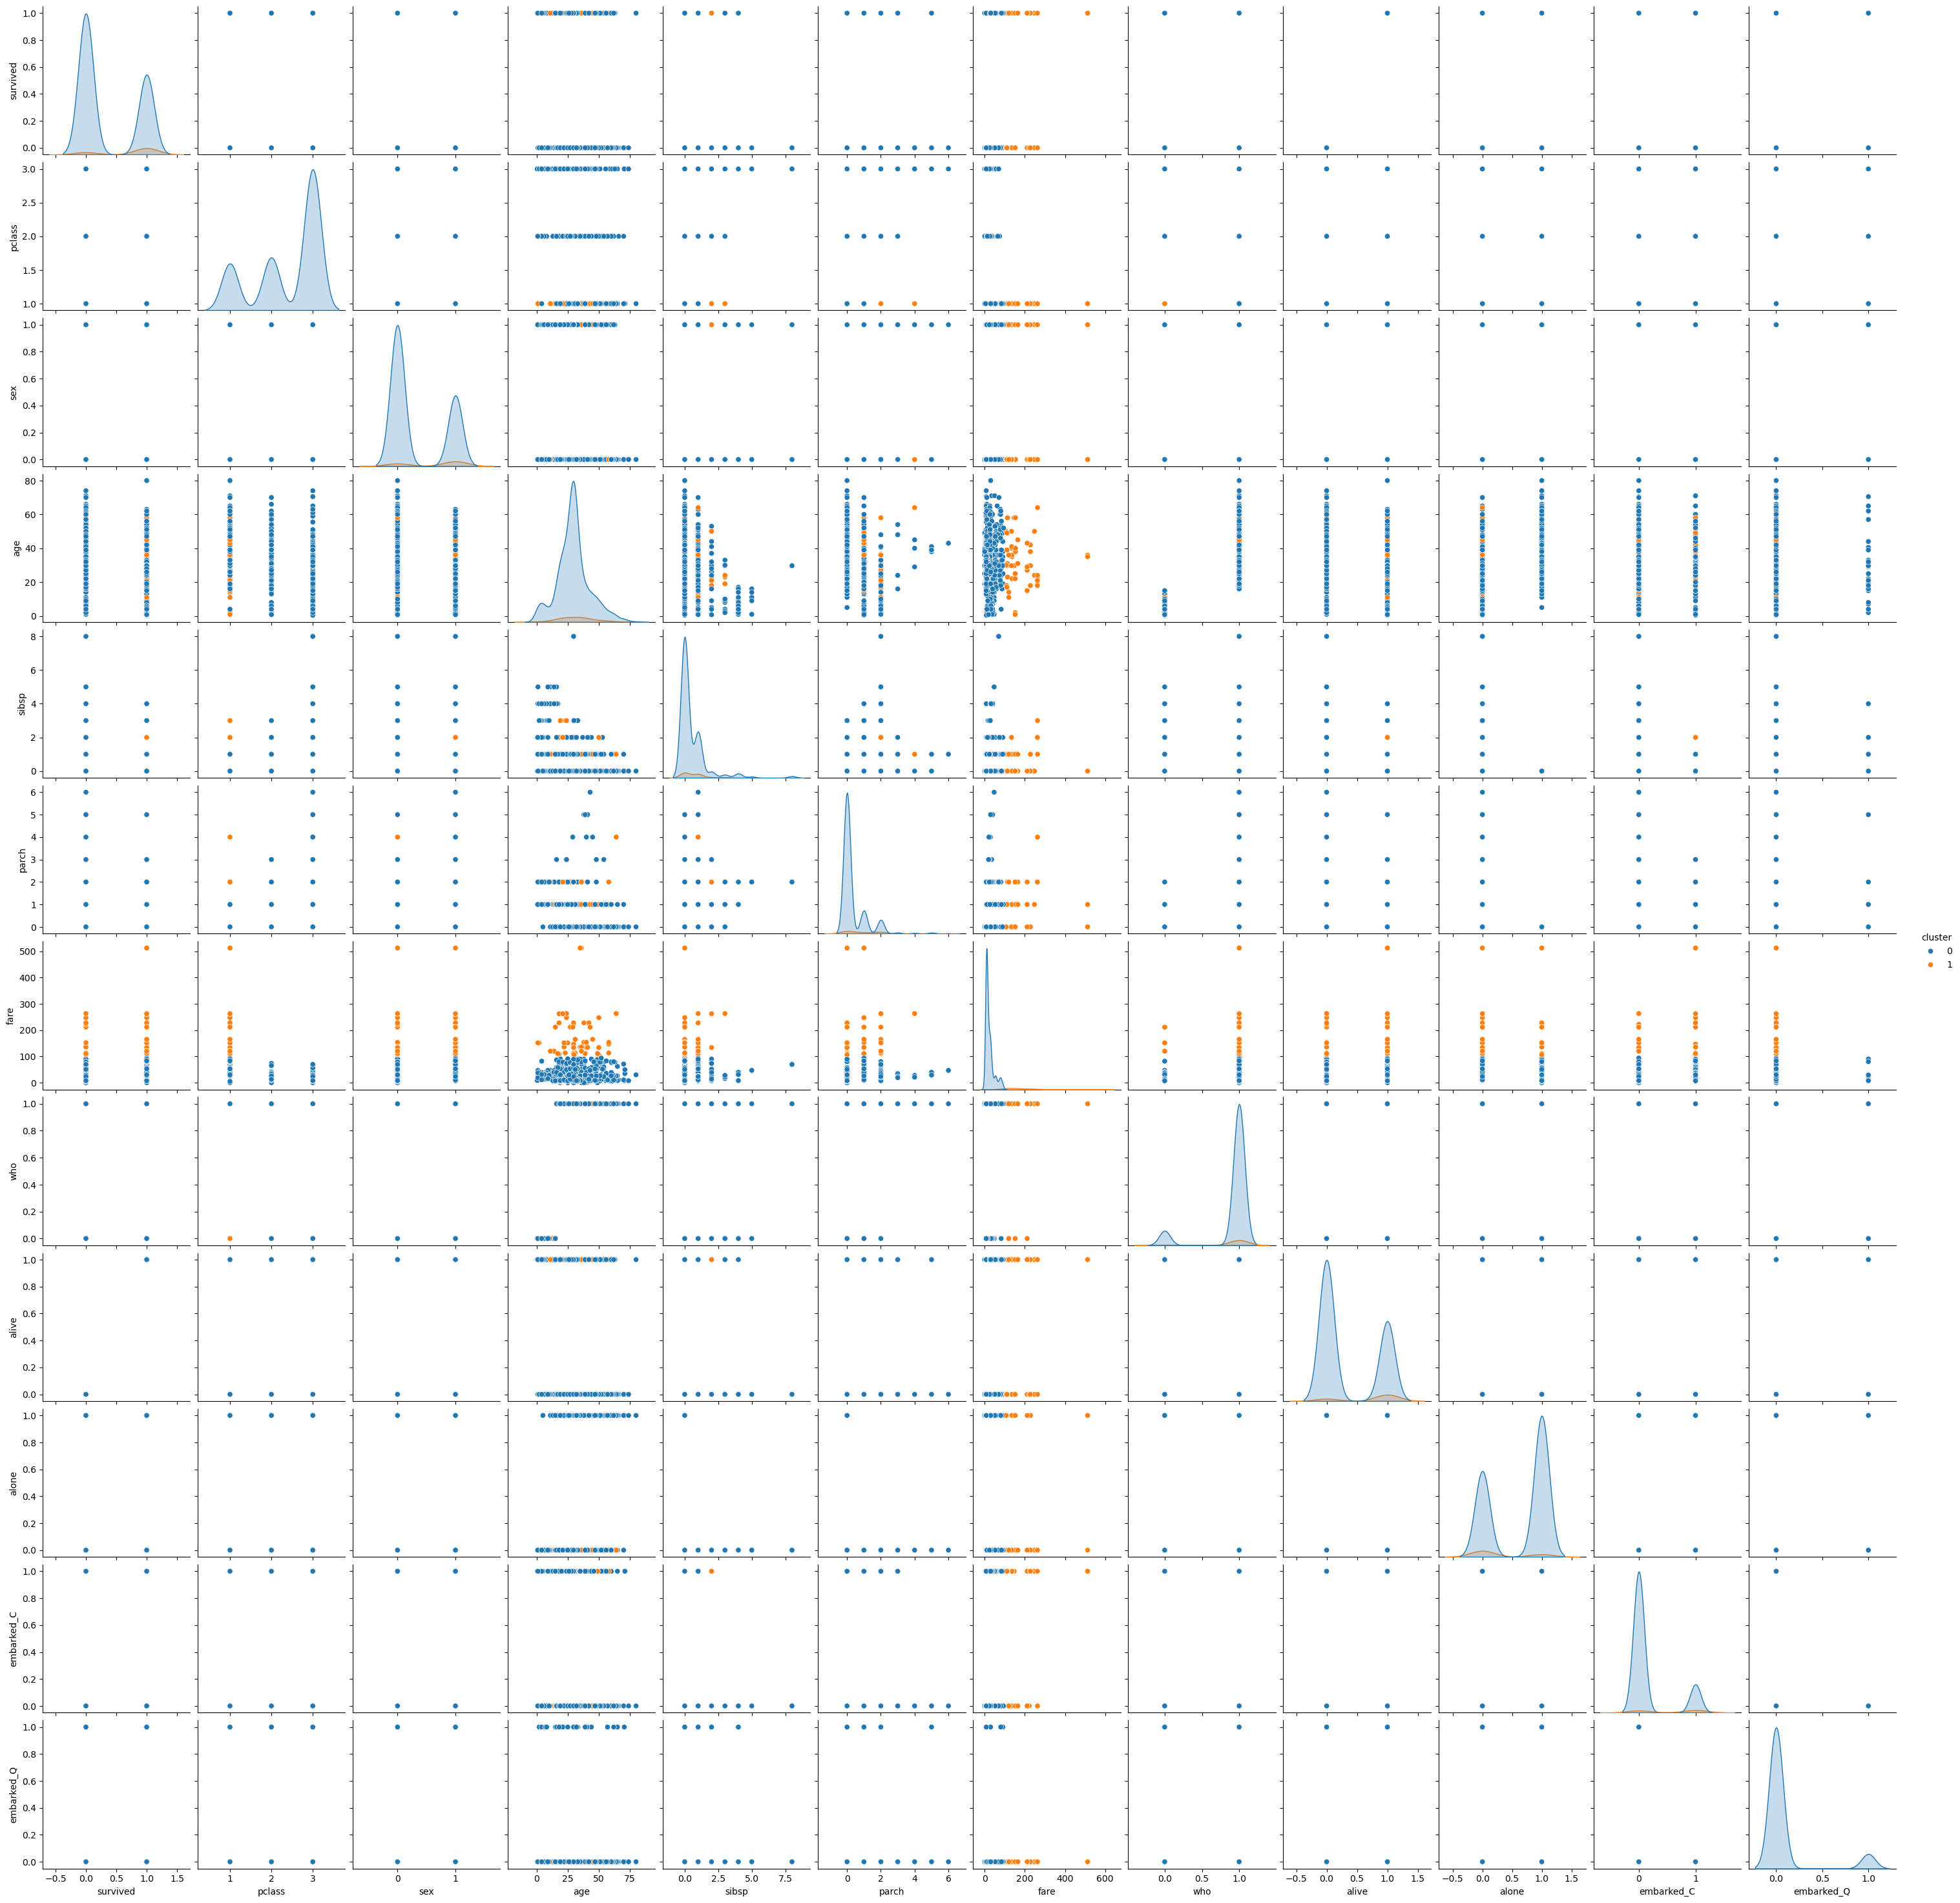

In [28]:
sns.pairplot(data, hue='cluster')

/Users/lucia/opt/anaconda3/envs/samsung/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


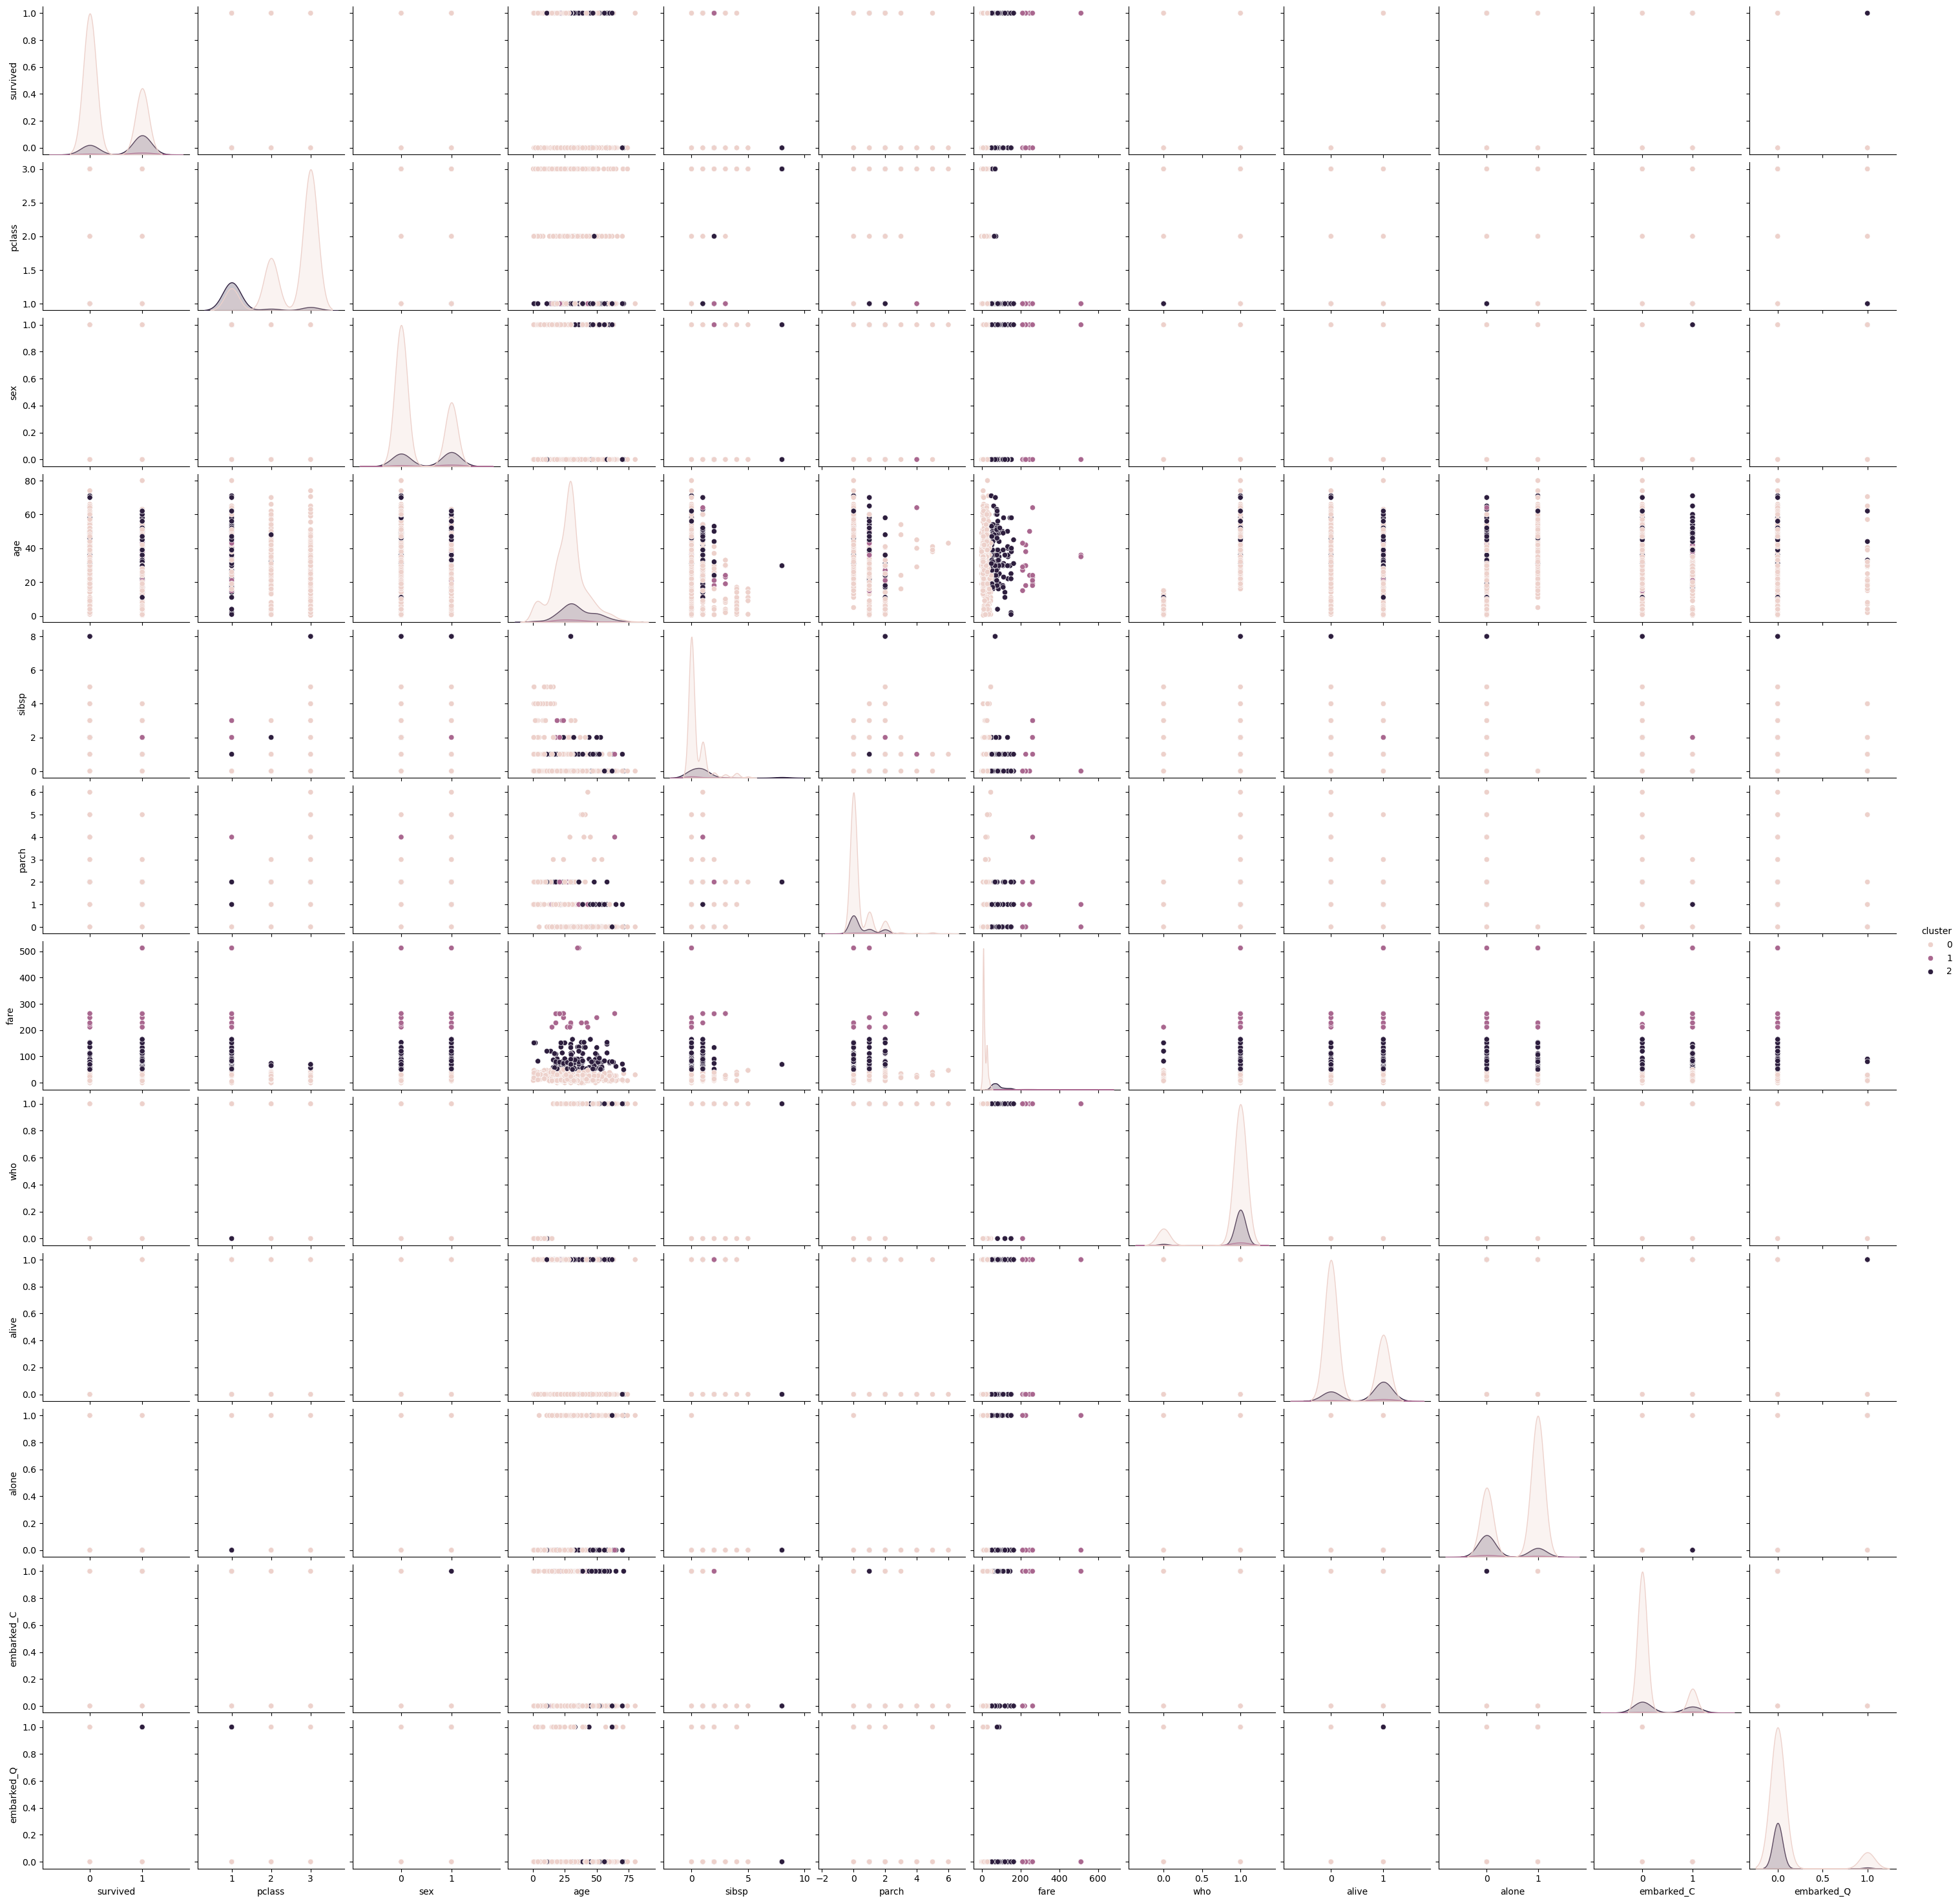

In [29]:
kmean = KMeans(n_clusters=3)
kmean.fit(data)
cluster_labels = kmean.labels_
data['cluster'] = cluster_labels
sns.pairplot(data, hue='cluster')

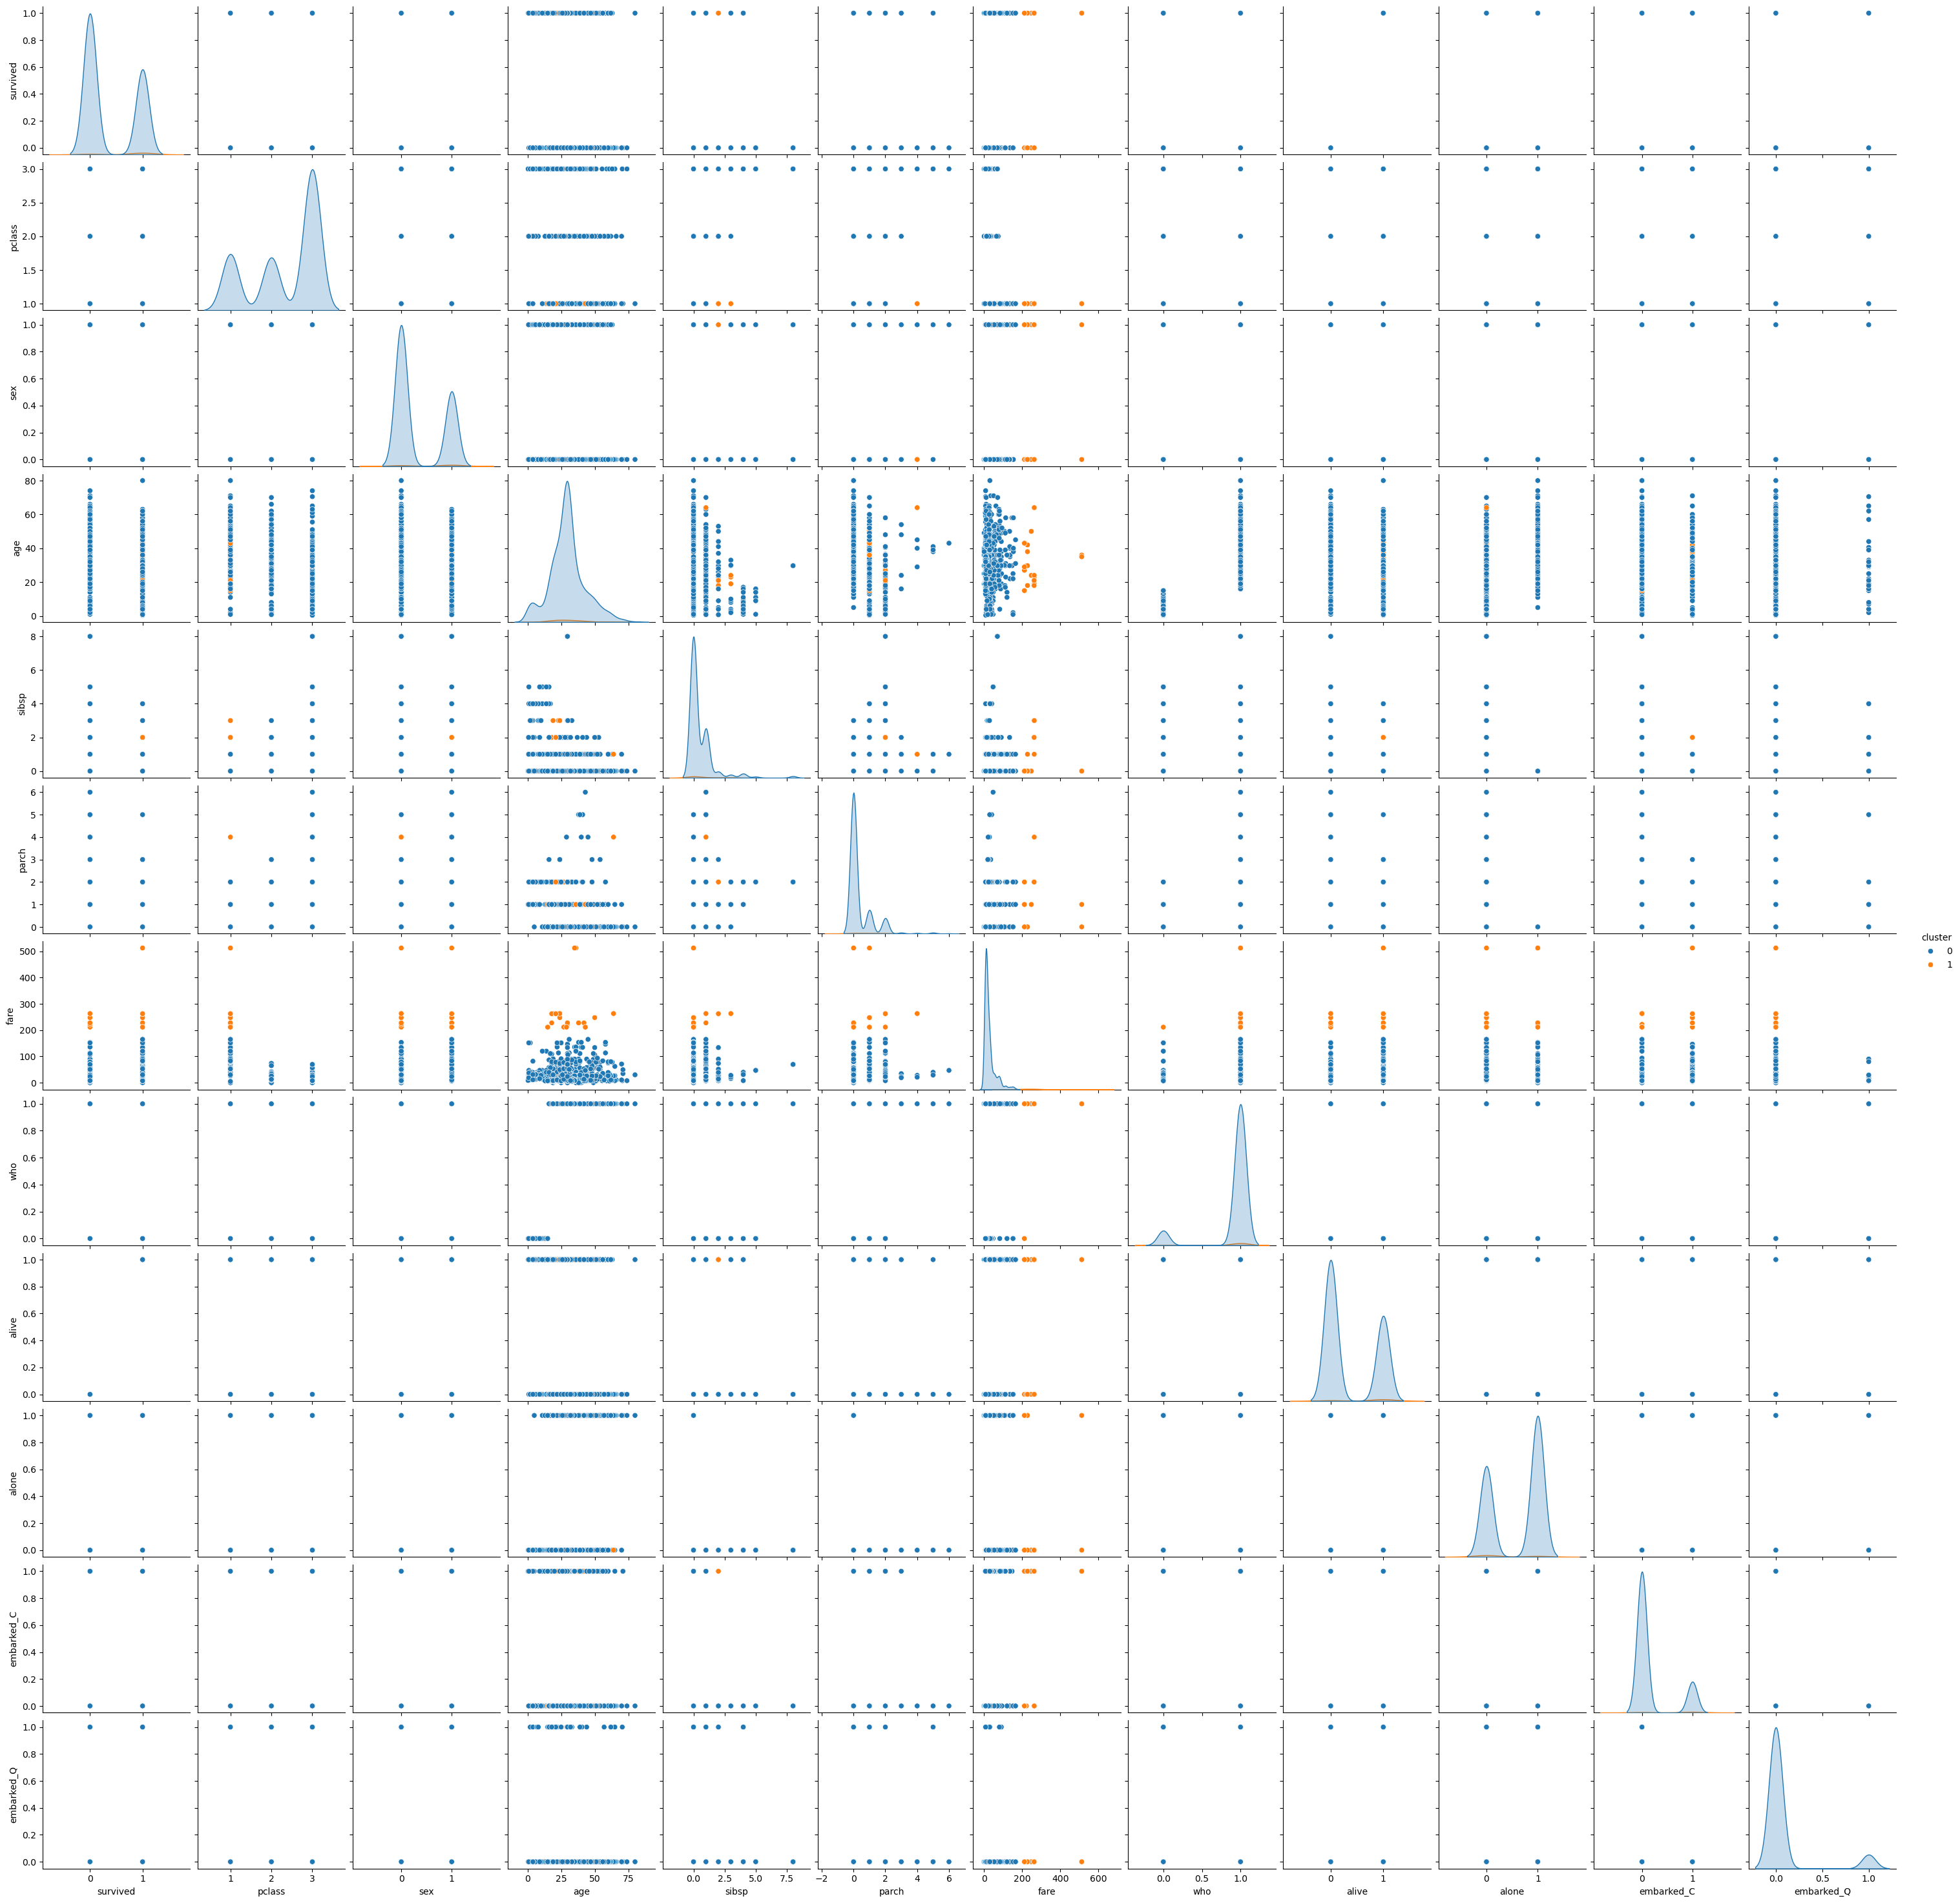

In [30]:
hier = AgglomerativeClustering(n_clusters=2)
hier.fit(data)
cluster_labels = hier.labels_
data['cluster'] = cluster_labels
sns.pairplot(data, hue='cluster')

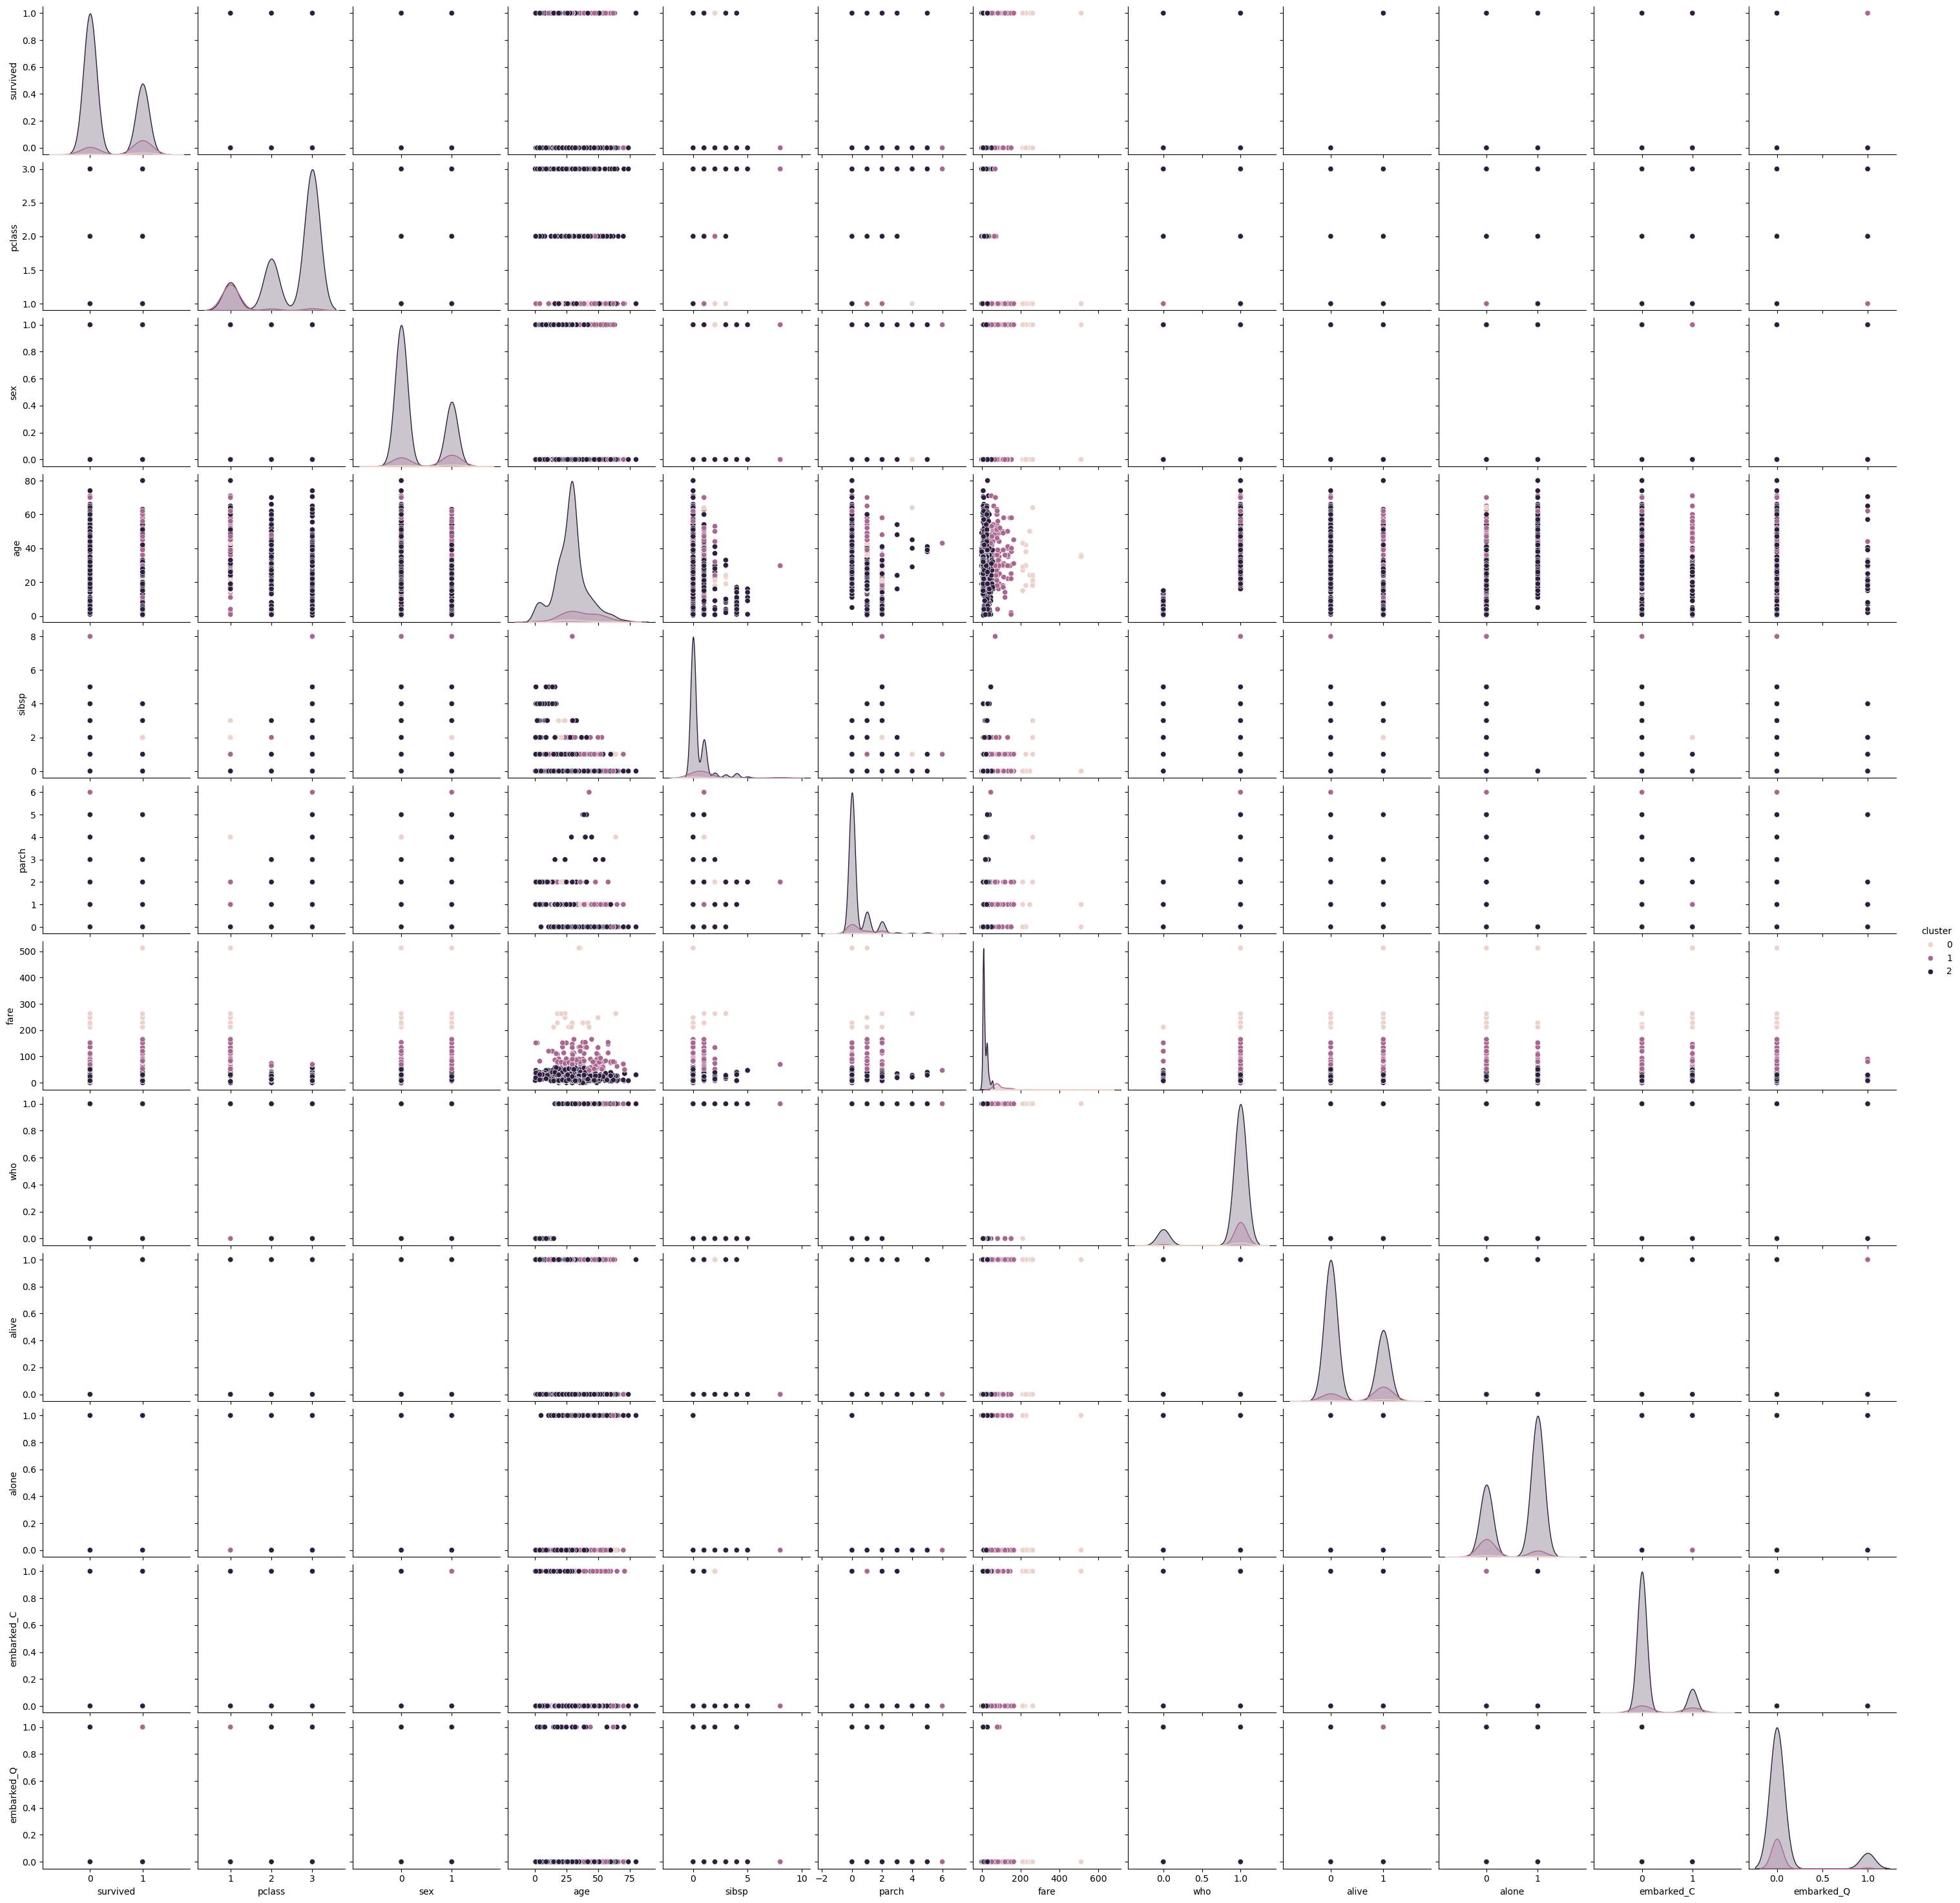

In [31]:
hier = AgglomerativeClustering(n_clusters=3)
hier.fit(data)
cluster_labels = hier.labels_
data['cluster'] = cluster_labels
sns.pairplot(data, hue='cluster')

Vamos a ver qué pasa si normalizamos!!

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
data_scaled = StandardScaler().fit_transform(data)

/Users/lucia/opt/anaconda3/envs/samsung/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


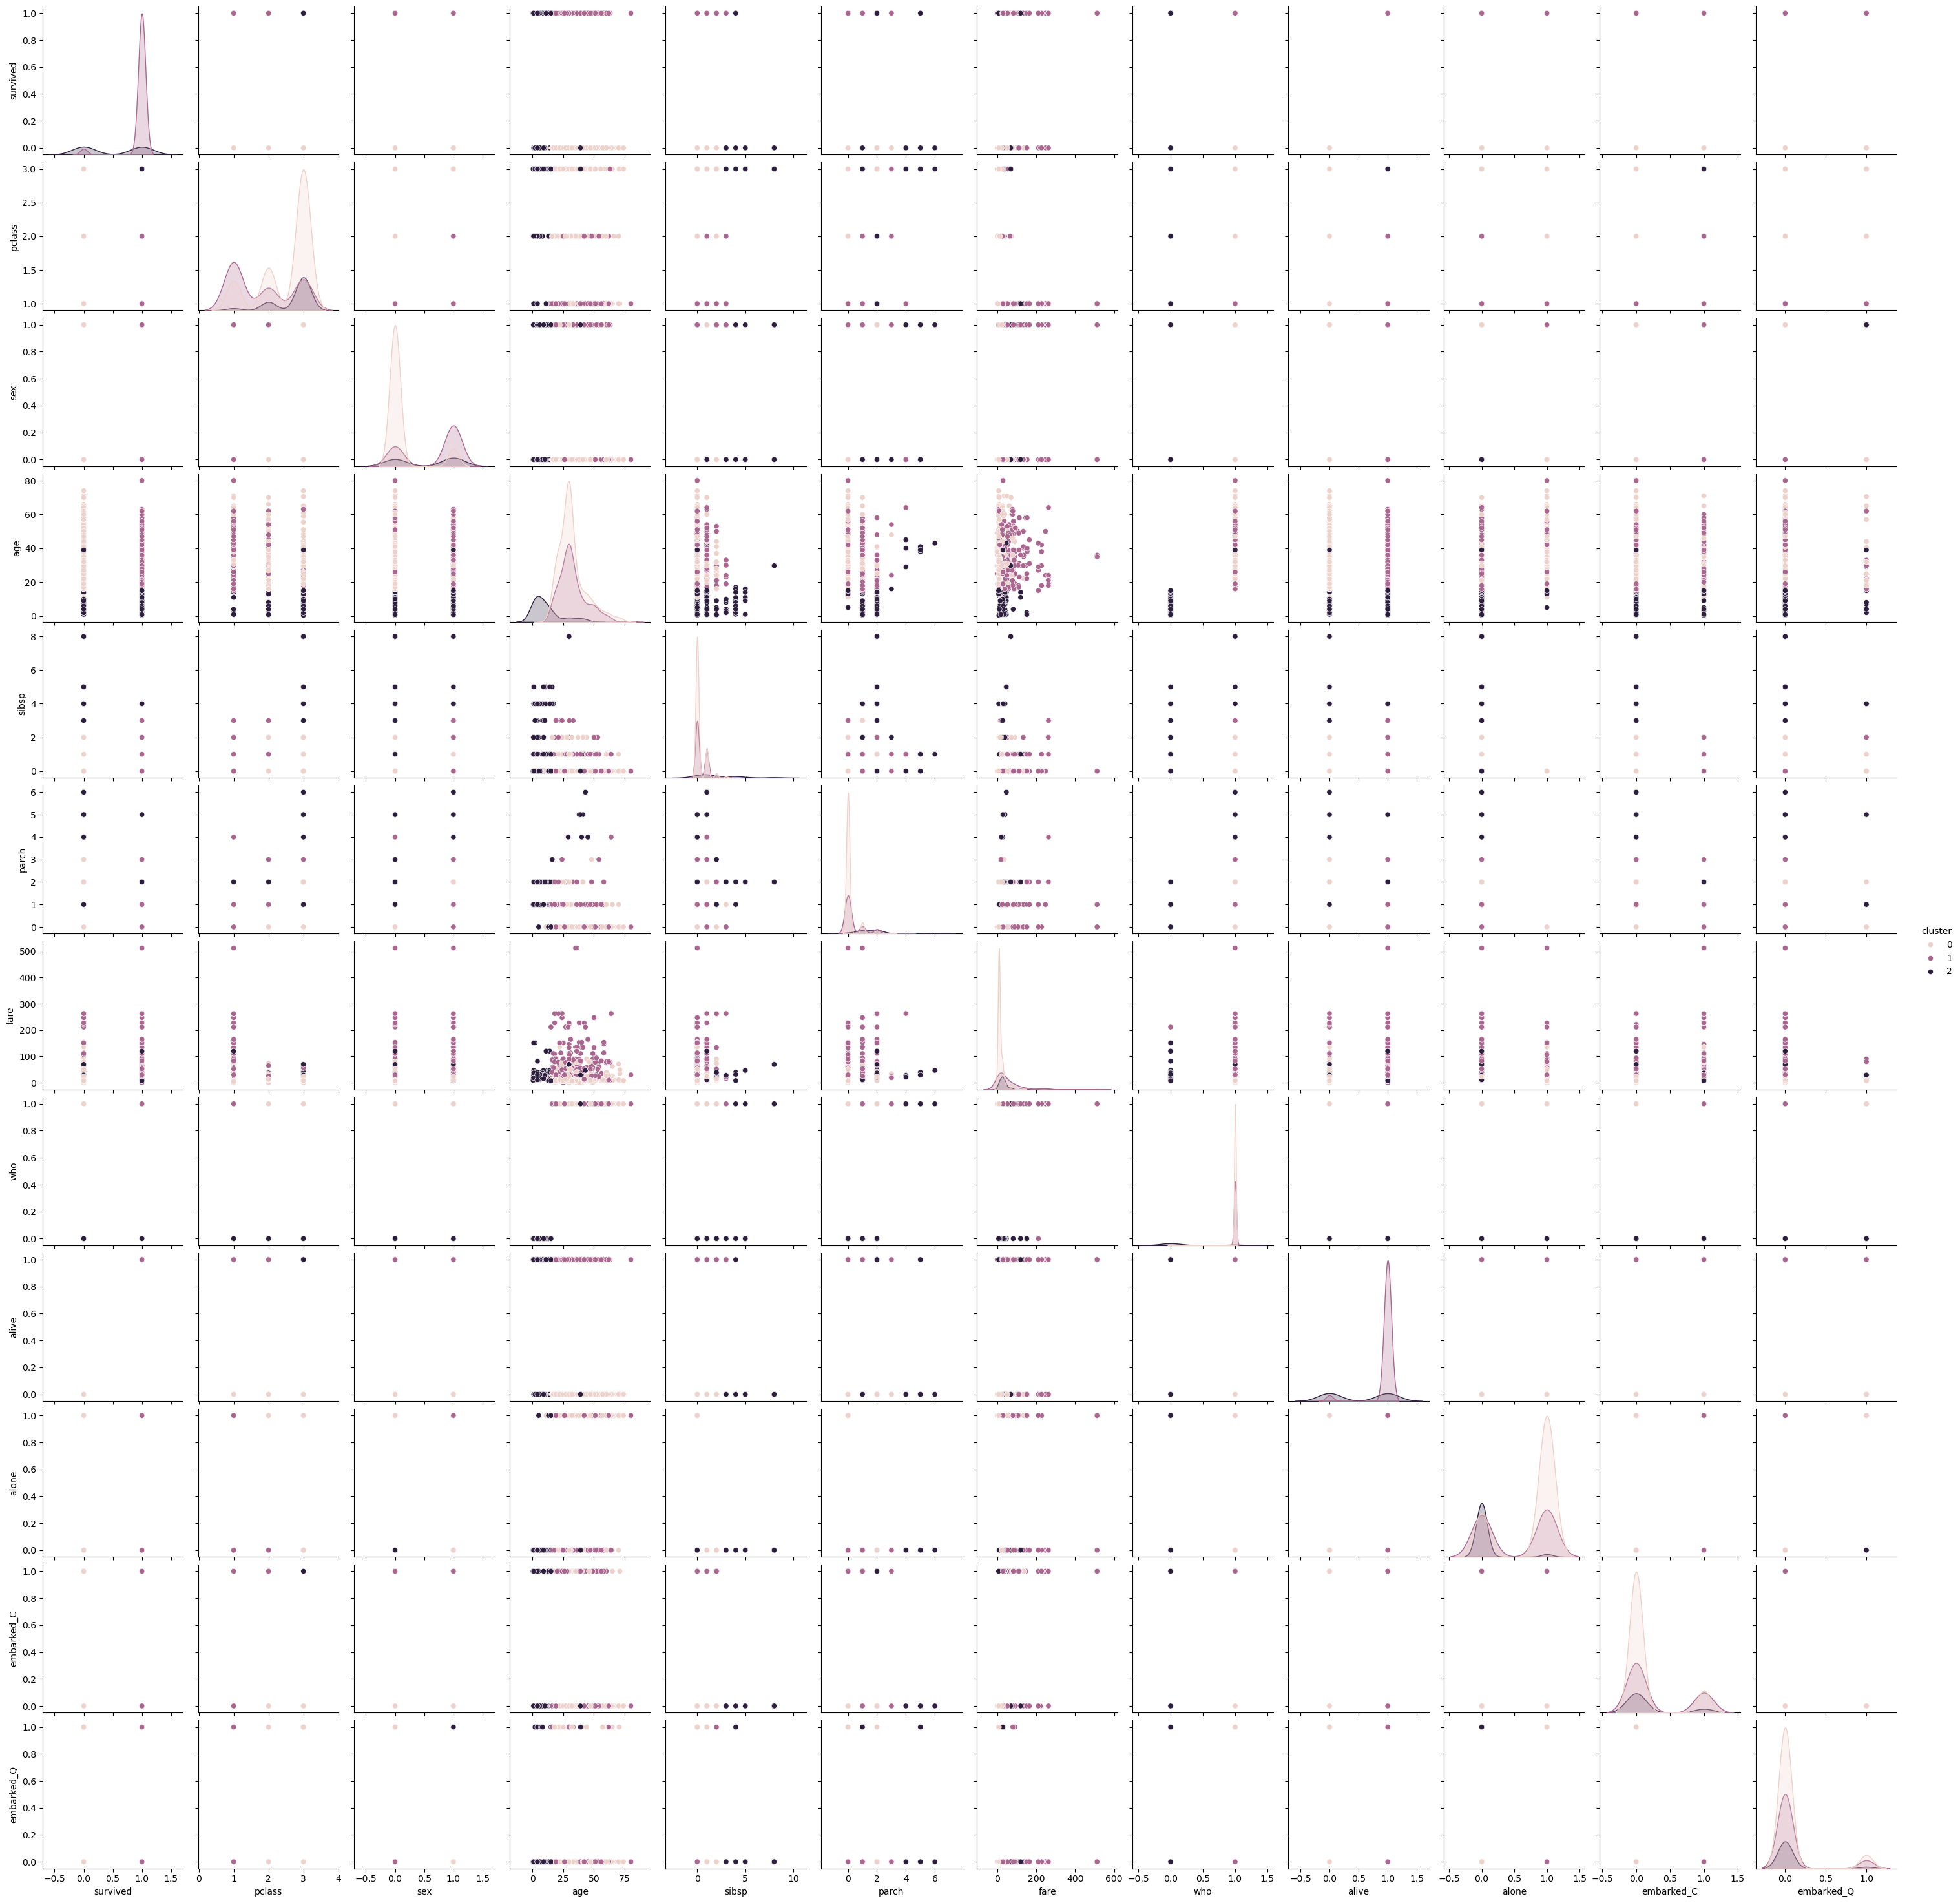

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_
data['cluster'] = cluster_labels
sns.pairplot(data, hue='cluster')

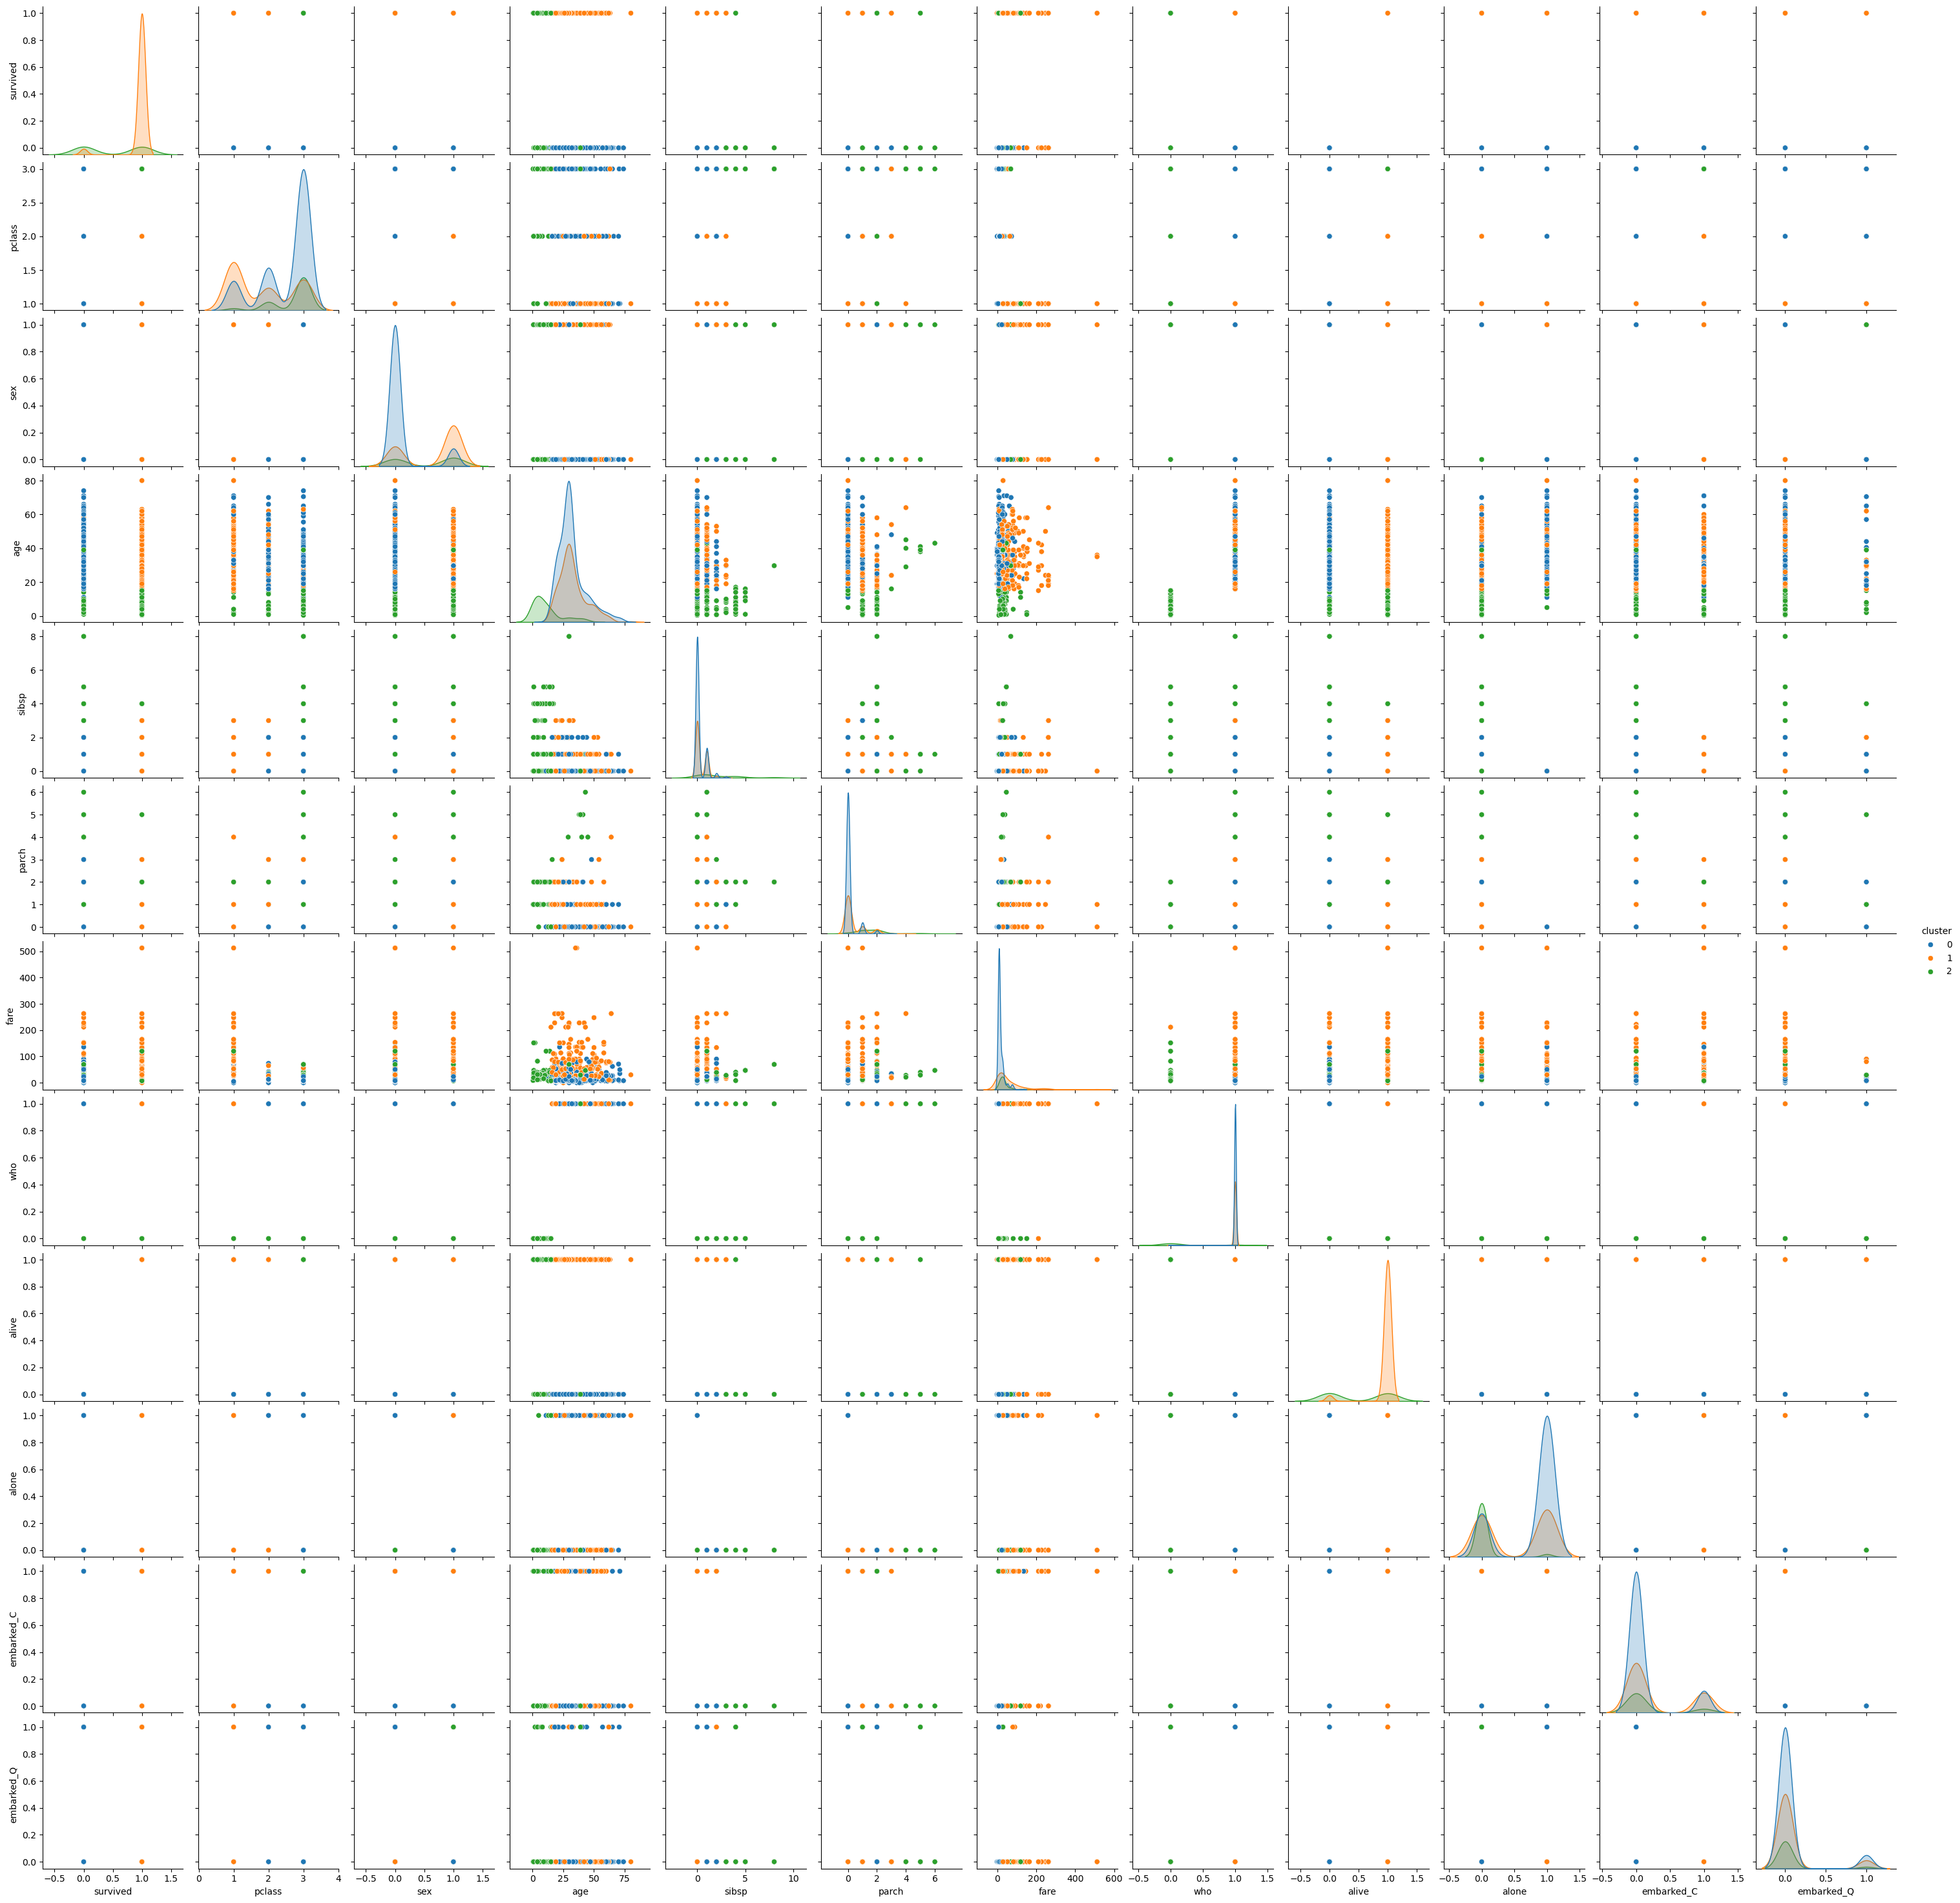

In [35]:
sns.pairplot(data, hue='cluster', palette='tab10')

In [43]:
data.cluster.value_counts()

cluster
0    485
1    303
2    103
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

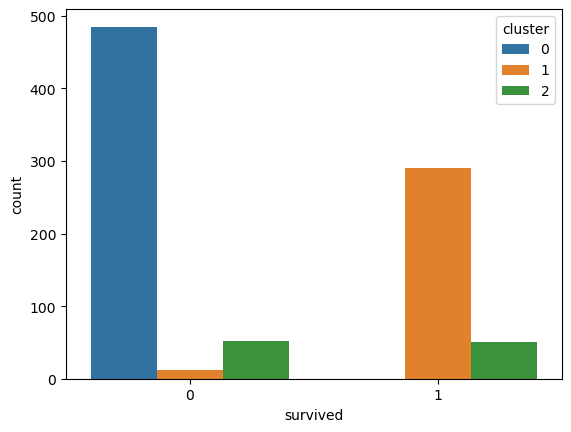

In [41]:
sns.countplot(data=data,
              x='survived', 
              hue='cluster', 
              palette='tab10'
              )

<Axes: xlabel='pclass', ylabel='count'>

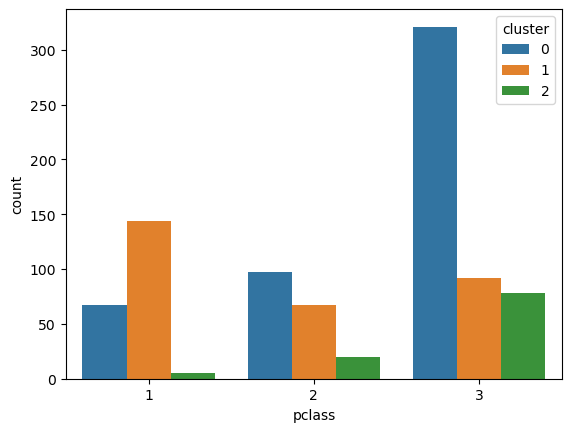

In [42]:
sns.countplot(data=data,
              x = 'pclass',
              hue='cluster',
              palette='tab10'
              )

<Axes: xlabel='sex', ylabel='count'>

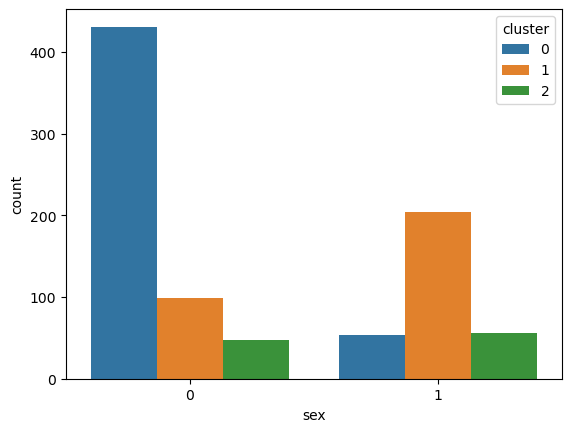

In [44]:
sns.countplot(data=data,
              x='sex',
              hue='cluster',
              palette='tab10'
              )

<Axes: xlabel='cluster', ylabel='age'>

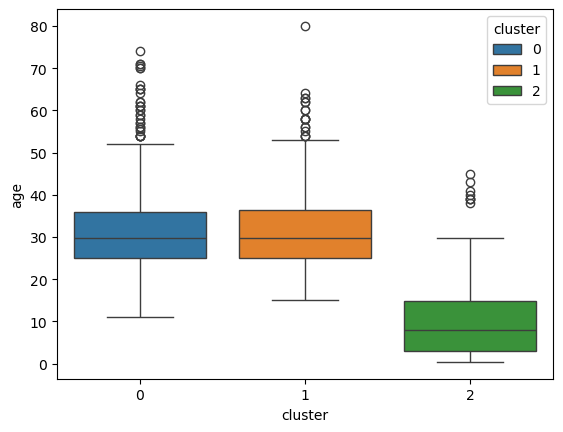

In [48]:
sns.boxplot(data=data,
            y='age',
            x='cluster',
            hue='cluster',
            palette='tab10'
            )

<Axes: xlabel='age', ylabel='cluster'>

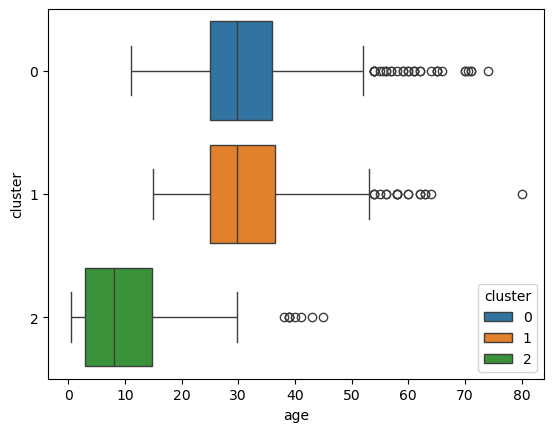

In [49]:
sns.boxplot(data=data,
            x='age',
            y='cluster',
            hue='cluster',
            orient='h',
            palette='tab10'
            )

<Axes: xlabel='age', ylabel='cluster'>

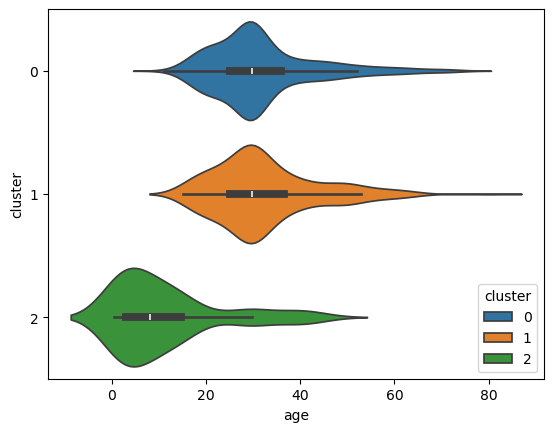

In [52]:
sns.violinplot(data=data,
            x='age',
            y='cluster',
            hue='cluster',
            orient='h',
            palette='tab10'
            )

<Axes: xlabel='sibsp', ylabel='cluster'>

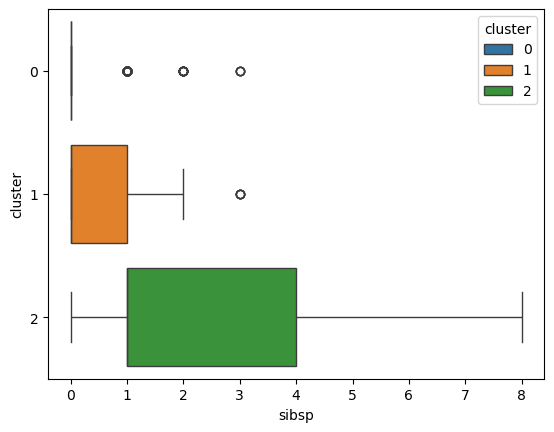

In [54]:
sns.boxplot(data = data,
            y='cluster',
            x='sibsp',
            orient='h',
            hue='cluster',
            palette='tab10'
            )

<Axes: xlabel='sibsp', ylabel='Count'>

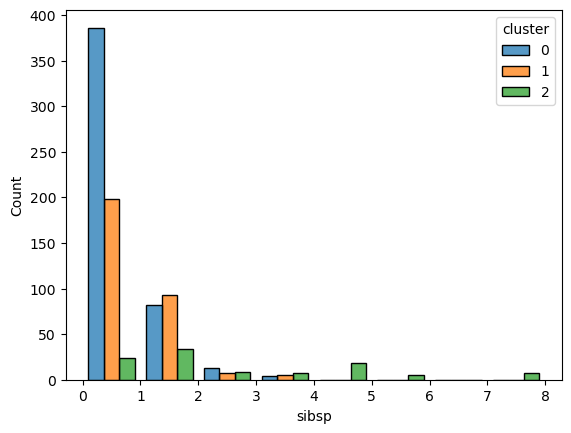

In [64]:
sns.histplot(data=data,
             x='sibsp',
             hue='cluster',
             palette='tab10',
             bins=8,
             #kde=True,
             multiple='dodge',
            #common_norm=False,
             shrink=0.8
             )

<Axes: xlabel='sibsp', ylabel='Density'>

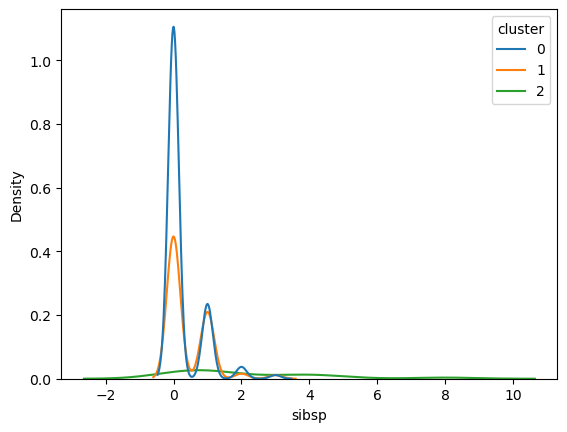

In [65]:
sns.kdeplot(data=data,
             x='sibsp',
             hue='cluster',
             palette='tab10',
             )

<Axes: xlabel='parch', ylabel='cluster'>

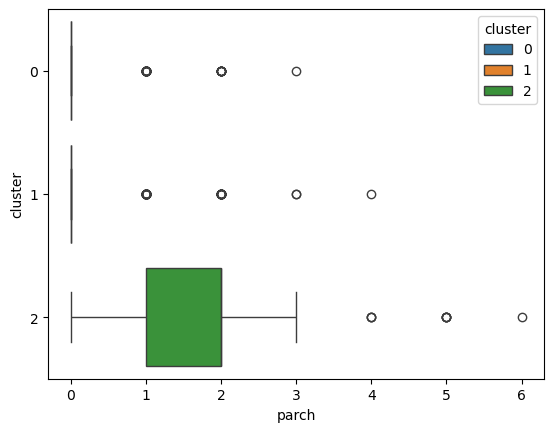

In [66]:
sns.boxplot(data = data,
            y='cluster',
            x='parch',
            orient='h',
            hue='cluster',
            palette='tab10'
            )

<Axes: xlabel='fare', ylabel='cluster'>

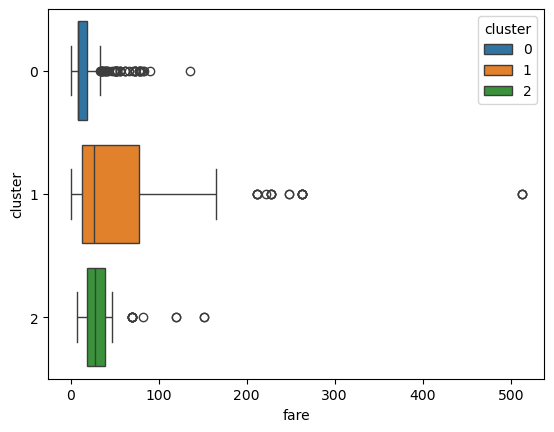

In [67]:
sns.boxplot(data = data,
            y='cluster',
            x='fare',
            orient='h',
            hue='cluster',
            palette='tab10'
            )

<Axes: xlabel='pclass', ylabel='count'>

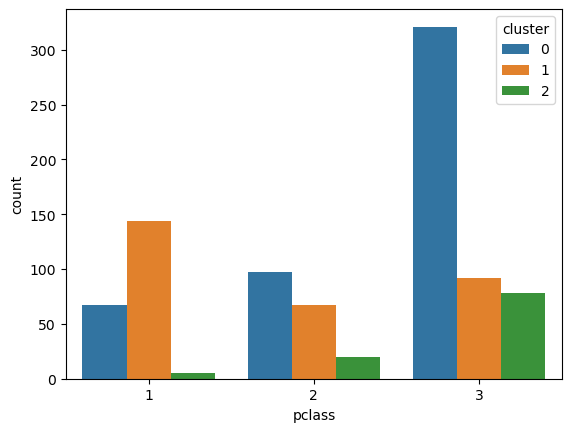

In [69]:
sns.countplot(data=data,
              x='pclass',
              hue='cluster',
              palette='tab10')

<Axes: xlabel='pclass', ylabel='fare'>

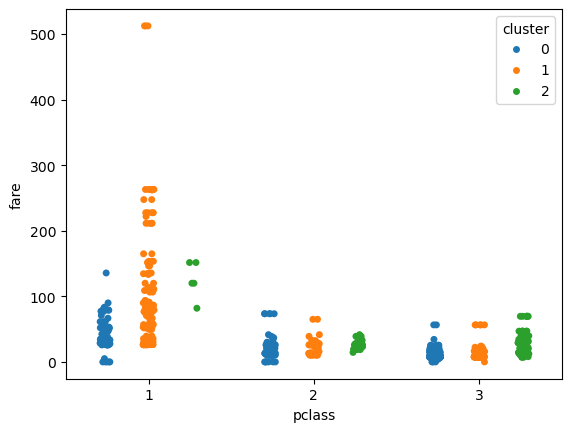

In [73]:
sns.stripplot(data=data,
              x='pclass',
              y='fare',
              hue='cluster',
              dodge=True,
              palette='tab10')